# Prediksi Harga Emas



### Anggota Kelompok:
* H071201019 Risky Auliah Nur Qalbi
* H071201020 Nanda Putri Ramadhani
* H071201029 Nur Izlamiyah Alim
* H071201030 Dhea Gita

### Deskripsi Data
Emas merupakan logam mulia yang paling banyak diminati oleh masyarakat, bukan hanya untuk digunakan sebagai perhiasan tapi juga untuk investasi. Harga emas memang mengacu pada kondisi pasar global. Namun, banyak peristiwa yang mampu mempengaruhi pergerakan harganya. Karena bersifat *risk free*, harga emas secara umum cenderung naik.

Dalam penelitian ini, [dataset](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data) yang digunakan memberikan informasi tentang harga emas berdasarkan beberapa harga saham lainnya seperti yang diberikan di bawah ini di mana kita harus menganalisis harga emas dan membangun model Machine Learning terbaik untuk memprediksi harga emas.

### Data fields
* **Date** - tanggal dengan format mm/dd/yyyy
* **SPX** - indeks saham yang lebih luas cakupannya, terdiri dari 500 perusahaan besar AS. 
* **GLD** - Harga Emas
* **USO** - Harga Minyak Amerika Serikat
* **SLV** - Harga Perak/ Silver
* **EUR/USD** - nilai tukar uang EURO terhadap dolar US.

### Objektif
* Part 1: Persiapan Dataset
* Part 2: EDA (*Exploratory Data Analysis*)
* Part 3: Split Dataset
* Part 4: Membangun Model
* Part 5: Pengujian Model


### Yang Diperlukan
* Python library: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`
* Datafiles: `gld_price_data.csv`

## Part 1: Persiapan Dataset

membaca data csv:

In [1]:
import pandas as pd

dfile = 'gld_price_data.csv'
df = pd.read_csv(dfile)

memverifikasi data dengan menampilkan lima data teratas:

In [2]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


menampilkan lima data terbawah:

In [3]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


menampilkan deskripsi statistik data:

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


menampilkan informasi dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## Part 2: EDA (*Exploratory Data Analysis*)

mencari categorical features yang bertipe objek dan tidak termasuk 'GLD':

In [6]:
categorical_features = [feature for feature in df.columns if((df[feature].dtypes == 'O') 
                                                             & (feature not in ['GLD']))]
categorical_features

['Date']

mencari numerical_features yang tidak bertipe objek dan tidak termasuk 'GLD':

In [7]:
numerical_features = [feature for feature in df.columns if((df[feature].dtypes != 'O') 
                                                           & (feature not in ['GLD']))]
numerical_features

['SPX', 'USO', 'SLV', 'EUR/USD']

mencari features yang bernilai diskrit:

In [8]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print("Jumlah variabel diskrit: {}".format(len(discrete_feature )))

Jumlah variabel diskrit: 0


mencari features yang bernilai kontinu:

In [9]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['GLD']]
print("Jumlah variabel kontinu: {}".format(len(continuous_features)))

Jumlah variabel kontinu: 4


### a. Visualisasi Distribusi Plot

In [10]:
import seaborn as sns

distribusi plot SPX:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPX', ylabel='Density'>

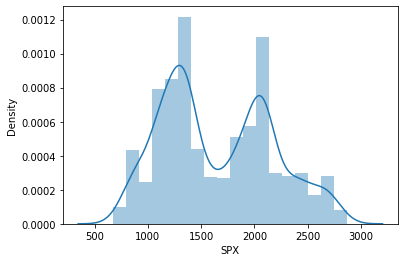

In [11]:
sns.distplot(df['SPX'])

distribusi plot USO:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USO', ylabel='Density'>

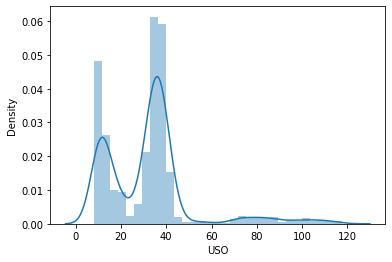

In [12]:
sns.distplot(df['USO'])

Grafik distribusi USO tampak lebih condong ke kanan dan terlihat memiliki banyak outliers

distribusi plot SLV:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SLV', ylabel='Density'>

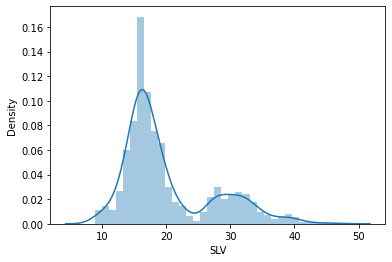

In [13]:
sns.distplot(df['SLV'])

distribusi plot EUR/USD:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EUR/USD', ylabel='Density'>

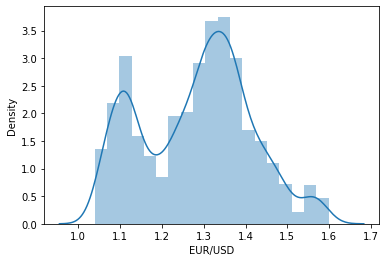

In [14]:
sns.distplot(df['EUR/USD'])

### b. Visualisasi Scatter Plot

In [15]:
import matplotlib.pyplot as plt

scatter plot SPX terhadap GLD:

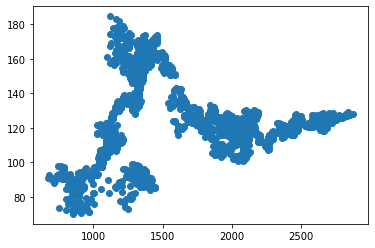

In [16]:
plt.scatter(df['SPX'], df['GLD'])

scatter plot USO terhadap GLD:

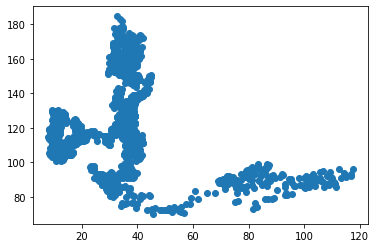

In [17]:
plt.scatter(df['USO'], df['GLD'])

scatter plot SLV terhadap GLD:

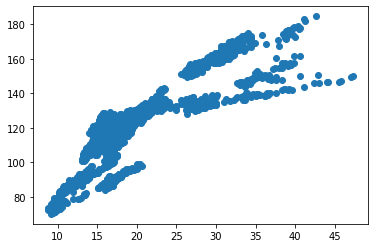

In [18]:
plt.scatter(df['SLV'], df['GLD'])

terlihat membentuk garis linear

scatter plot EUR/USD terhadap GLD:

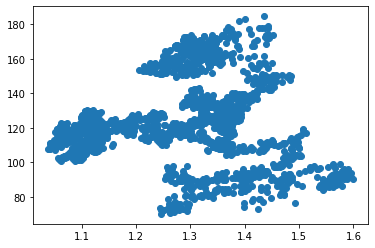

In [19]:
plt.scatter(df['EUR/USD'], df['GLD'])

### c. Visualisasi Box Plot untuk mencari outliers

box plot SPX:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SPX'>

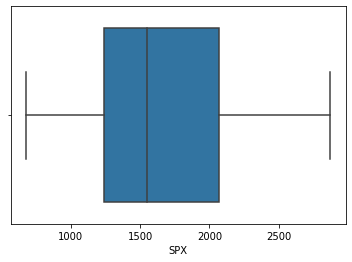

In [20]:
sns.boxplot(df['SPX'])

box plot USO:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='USO'>

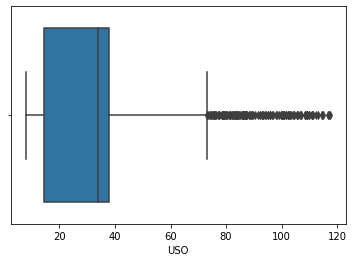

In [21]:
sns.boxplot(df['USO'])

box plot SLV:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLV'>

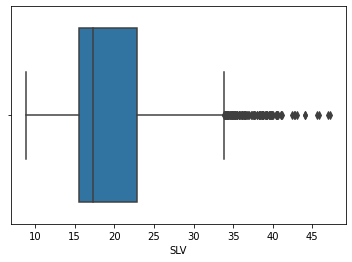

In [22]:
sns.boxplot(df['SLV'])

box plot EUR/USD:

C:\Users\Dhea Gita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EUR/USD'>

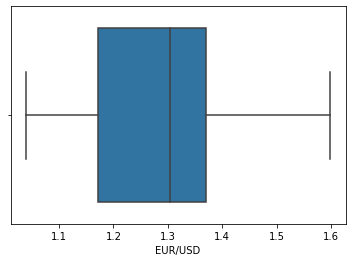

In [23]:
sns.boxplot(df['EUR/USD'])

### d. Visualisasi Heatmap Korelasi

<AxesSubplot:>

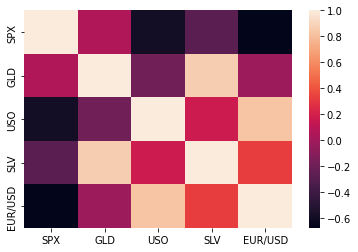

In [24]:
sns.heatmap(df.corr())

nilai korelasi antara GLD dengan variabel lainnya

In [25]:
print(df.corr()['GLD'].sort_values(ascending=False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


### Hasil EDA
* kolom `Date` akan dihapus
* tak ada missing-value
* ditemukan outliers pada USO

## Part 3: Split Dataset Menjadi Data `test` dan `train`

memilih feature (X) dan target (Y):

In [26]:
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

membagi dataset dengan rasio 15%:85%

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

hasil pembagian dataset:

In [28]:
print("Jumlah data X_train:", len(X_train))
print("Jumlah data X_test:", len(X_test))

Jumlah data X_train: 1946
Jumlah data X_test: 344


menampilkan lima data teratas X_train

In [29]:
X_train.head()

,SPX,USO,SLV,EUR/USD
2016,2347.219971,11.410000,17.150000,1.060738
1123,1517.010010,35.119999,30.000000,1.336827
1523,2075.370117,24.959999,15.610000,1.238666
2064,2388.129883,9.930000,15.590000,1.088898
756,1271.829956,38.259998,33.869999,1.441691


##  Part 4: Membangun Model

#### Model 1: Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=2)
dt_model.fit(X_train, y_train)
dt_test_predict = dt_model.predict(X_test)

#### Model 2: Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_test_predict = rf_model.predict(X_test)

##  Part 5: Pengujian Model

menampilkan lima list pertama harga emas `y_test`

In [32]:
list(y_test[:5])

[168.020004, 81.230003, 112.32, 127.589996, 119.620003]

menampilkan hasil prediksi harga emas

In [33]:
print("Prediksi DecisionTree:", dt_test_predict[:5])
print("Prediksi RandomForest:", rf_test_predict[:5])

Prediksi DecisionTree: [168.5       86.089996 110.57     127.550003 121.730003]
Prediksi RandomForest: [168.4956989   82.1989997  114.40779983 127.66670114 120.97320139]


#### a. MAE (Mean Absolute Error)

In [34]:
from sklearn.metrics import mean_absolute_error

dt_test_mae = mean_absolute_error(dt_test_predict, y_test)
rf_test_mae = mean_absolute_error(rf_test_predict, y_test)

print("MAE y_test untuk model DecisionTree: {}".format(dt_test_mae))
print("MAE y_test untuk model RandomForest: {}".format(rf_test_mae))

MAE y_test untuk model DecisionTree: 1.6718780581395347
MAE y_test untuk model RandomForest: 1.2989864630523265


#### b. Metrics (Skor Akurasi)

In [35]:
from sklearn import metrics

dt_error_score = metrics.r2_score(y_test, dt_test_predict)
rf_error_score = metrics.r2_score(y_test, rf_test_predict)

print("Akurasi prediksi DecisionTree:", dt_error_score)
print("Akurasi prediksi RandomForest:", rf_error_score)

Akurasi prediksi DecisionTree: 0.97030613469304
Akurasi prediksi RandomForest: 0.9888382277428257


In [36]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "scroll": True,
        }
    )